# Mujoco simulation setup for unitree Z1

In [1]:
import mujoco
import mediapy as media
import numpy as np
# from darli.robots import RobotModel

%env MUJOCO_GL=egl

env: MUJOCO_GL=egl


## Load model and create renderer for simulation

Do not mix `darli` robot model with `mujoco`. They serve different purposes.

In [2]:
model = mujoco.MjModel.from_xml_path("../yet_another_menagerie/z1/scene.xml")
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

In [3]:
# to initialize darli model, uncomment below

# symmodel = RobotModel("yet_another_menagerie/z1/z1.urdf", ['link06'])

# symmodel.body('link06').position, symmodel.body('link06').rotation

### Simple visualization example

""

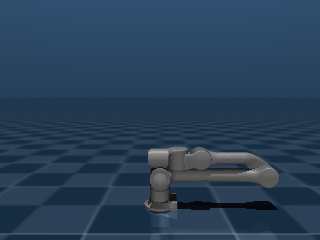

In [4]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

Control goes brrr

6 motors for this toy manipulator

In [5]:
# check that we have 6 joints to control
data.ctrl

array([0., 0., 0., 0., 0., 0.])

## Simulation routine

In [6]:
duration = 3  # (seconds)
framerate = 30 # used just for visualization

scene_option = mujoco.MjvOption()

# enable joint visualization option:
# scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

n_steps = int(np.ceil(duration * framerate)) + 1

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.

while data.time < duration:
    # TODO: your control should be inserted 
    data.ctrl[:] = np.random.rand(model.nv) * 5

    mujoco.mj_step(model, data)

    if len(frames) < data.time * framerate:
        renderer.update_scene(data, scene_option=scene_option)
        pixels = renderer.render()
        frames.append(pixels)

media.show_video(frames, fps=framerate)